In [21]:
import numpy as np
import dlsfunctions as dls
import initialization_data as init
import matplotlib.pyplot as plt

In [22]:
d = init.get_distance()

mean1 = init.get_left_mean()
sigma1 = init.get_narrow_sigma()

mean2 = init.get_right_mean()
sigma2 = init.get_wide_sigma()

c = init.c
m = init.m
beta = init.beta

f = dls.generate_bimodal_distribution(d, mean1, sigma1, mean2, sigma2, c)

time = init.get_log_time()
gamma = init.get_gamma()

noise = np.random.normal(mean1, sigma1, 200)*5e7

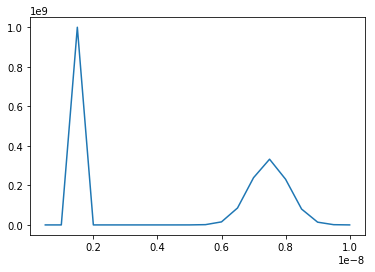

In [6]:
plt.plot(d,f)

In [7]:
dls.check_distribution_norm(f, d[1] - d[0])

0.9999999999999999

In [8]:
theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time) + noise

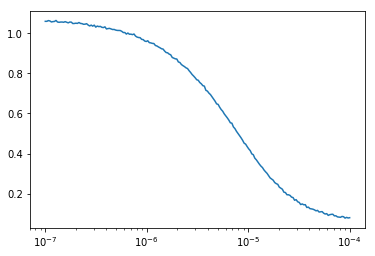

In [9]:
plt.semilogx(time, sim_data)

In [10]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [11]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.363, 0.358, 0.31 , 0.366, 0.357, 0.37 , 0.371, 0.34 , 0.368,
       0.349, 0.335, 0.365, 0.309, 0.361, 0.345, 0.37 , 0.361, 0.36 ,
       0.345, 0.316, 0.365, 0.369, 0.362, 0.376, 0.346, 0.365, 0.324,
       0.335, 0.341, 0.334, 0.355, 0.343, 0.369, 0.363, 0.336, 0.336,
       0.328, 0.346, 0.36 , 0.343, 0.328, 0.319, 0.349, 0.332, 0.357,
       0.4  , 0.333, 0.336, 0.345, 0.335, 0.333, 0.347, 0.337, 0.393,
       0.327, 0.36 , 0.375, 0.346, 0.359, 0.332, 0.366, 0.354, 0.327,
       0.356, 0.366, 0.387, 0.362, 0.35 , 0.331, 0.342, 0.339, 0.341,
       0.371, 0.358, 0.335, 0.326, 0.356, 0.325, 0.289, 0.336, 0.331,
       0.343, 0.358, 0.374, 0.372, 0.372, 0.32 , 0.34 , 0.331, 0.373,
       0.324, 0.358, 0.338, 0.35 , 0.34 , 0.374, 0.35 , 0.362, 0.345,
       0.374])

In [12]:
chained_sampler = dls.chain(result, 850, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,379032.289824,234227.686515,240804.156062,1.601908e+07,8.380555e+07,2.352696e+08,3.348539e+08,2.354114e+08,7.964767e+07,1.687248e+07,1.266650e+06,3.406059e+06,9.988984e+08,2.578022e+06,3.812995e+06,4.785717e+06,242846.911482,4.080953e+06,67803.921628,109629.177728


In [13]:
infer = np.zeros(20)
infer[0] = 379032.289824
infer[1] = 234227.686515
infer[2] = 9.988984e+08
infer[3] = 2.578022e+06
infer[4] = 3.812995e+06
infer[5] = 4.785717e+06
infer[6] = 242846.911482
infer[7] = 4.080953e+06
infer[8] = 67803.921628
infer[9] = 109629.177728
infer[10] = 240804.156062
infer[11] = 1.601908e+07
infer[12] = 8.380555e+07
infer[13] = 2.352696e+08
infer[14] = 3.348539e+08
infer[15] = 2.354114e+08
infer[16] = 7.964767e+07
infer[17] = 1.687248e+07
infer[18] = 1.266650e+06
infer[19] = 3.406059e+06

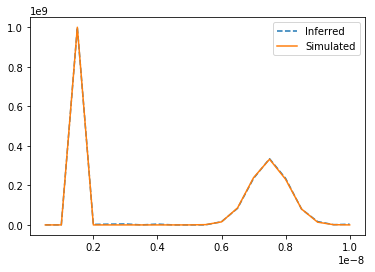

In [23]:
plt.plot(d, infer,'--', label='Inferred')
plt.plot(d, f, label='Simulated')
plt.legend()

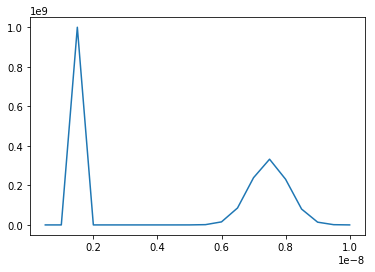

In [15]:
plt.plot(d, f)

In [18]:
beta_post = dls.get_beta(chained_sampler, ndim)
betaq = beta_post.quantile([0.8], axis=0)
betaq

,beta
0.8,1.104997


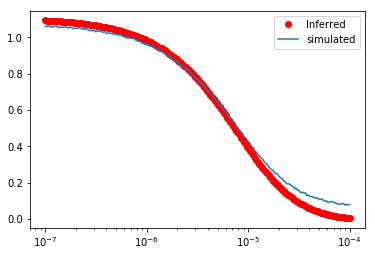

In [19]:
theta_infer = np.append(infer, 1.104997)
inferg2 = dls.g2(theta_infer, d, m, gamma, time)

plt.semilogx(time, inferg2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='simulated')
plt.legend()

(array([ 957., 1274., 2361., 3302., 2772., 2247., 1125.,  537.,  309.,
         116.]),
 array([1.09498898e-03, 1.99974348e-01, 3.98853708e-01, 5.97733067e-01,
        7.96612427e-01, 9.95491786e-01, 1.19437115e+00, 1.39325051e+00,
        1.59212986e+00, 1.79100922e+00, 1.98988858e+00]),
 <a list of 10 Patch objects>)

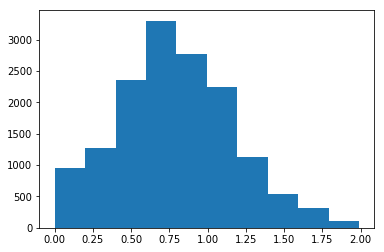

In [20]:
beta_posterior = beta_post.values.flatten()
plt.hist(beta_posterior)